# Bomberle: CCNs

## Figure 1: Simple state representation

/tmp/ipykernel_6404/4278770173.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.05, 1, 1.1])  # reserve space at bottom


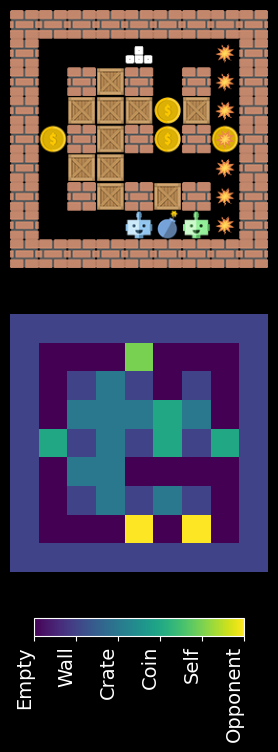

In [149]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from PIL import Image, ImageFont
from agent_code.user_agent.callbacks import state_to_cnn_features

# Paths
run_folder = "agent_code/user_agent/snapshots/20250927_180621/"
feature_file = os.path.join(run_folder, "features_00014.npy")
screenshot_file = os.path.join(run_folder, "screenshot_00014.png")
state_file = os.path.join(run_folder, "state_00014.pkl")


# Crop box (left, top, right_offset, bottom_offset)
CROP_BOX = (165, 165, -565, -165)

# --- Load data ---
features = np.load(feature_file)  # shape (9, 9, num_channels)
with open(state_file, "rb") as f:
    game_state = pickle.load(f)

# Load and crop screenshot
img = Image.open(screenshot_file)
width, height = img.size
left, top = CROP_BOX[0], CROP_BOX[1]
right, bottom = width + CROP_BOX[2], height + CROP_BOX[3]
cropped = img.crop((left, top, right, bottom))

plt.imshow(cropped)
plt.axis("off")
plt.savefig("figures/screenshot.png")
plt.tight_layout(pad=0)
plt.close()
# --- Build CNN features from game_state (if needed) ---
# Option 1: Use stored features
cnn_features = features

# Option 2: Recompute features from dict
# cnn_features = state_to_cnn_features(game_state)

# Pick a subset of channels to visualize (example: walls, crates, agent position)
channel_names = [
    "Wall", "Free", "Crate",
    "Bomb timer", "Danger", "Explosion",
    "Coin", "Self", "Opponent",
    "Self can bomb", "Opp can bomb"
]
channels_to_show = [0, 2, 6, 7, 8]  # indices of cnn_features[..., channel]


# Right: stacked feature bitmap (e.g. max over selected channels)
# For illustration: combine into categorical map
combined = np.zeros(cnn_features.shape[:2], dtype=int)
for idx, ch in enumerate(channels_to_show, start=1):
    combined += (cnn_features[..., ch] > 0) * idx

fig, axes = plt.subplots(2, 1, figsize=(3, 6))  # tall figure
# Top: screenshot
axes[0].imshow(cropped)
axes[0].axis("off")
axes[0].set_aspect("equal")  # preserve aspect

cmap = "viridis"
labels = ["Empty", "Wall", "Crate", "Coin", "Self", "Opponent"]
# Bottom: feature map
im = axes[1].imshow(combined.T, cmap=cmap, interpolation="nearest")
axes[1].axis("off")
axes[1].set_aspect("equal")

# --- Create a custom colorbar axis below both subplots ---
# [left, bottom, width, height] in figure fraction coordinates
cax = fig.add_axes([0.15, 0.0, 0.7, 0.03])  # adjust bottom (0.05) to move lower
cbar = fig.colorbar(im, cax=cax, orientation="horizontal", ticks=range(len(labels)))
cbar.ax.set_xticklabels(labels, rotation=90, ha="right")

plt.tight_layout(rect=[0, 0.05, 1, 1.1])  # reserve space at bottom
plt.savefig("figures/13_cnn_simple_representation.png", bbox_inches="tight")

plt.show()


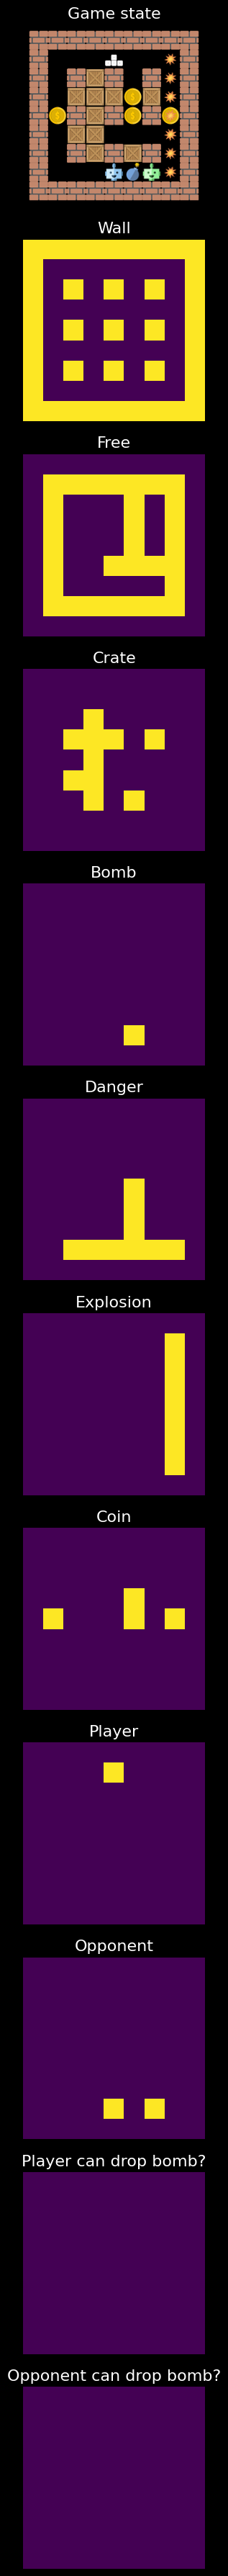

In [124]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from agent_code.user_agent.callbacks import state_to_cnn_features

# Paths
run_folder = "agent_code/user_agent/snapshots/20250927_180621/"
feature_file = os.path.join(run_folder, "features_00014.npy")
screenshot_file = os.path.join(run_folder, "screenshot_00014.png")
state_file = os.path.join(run_folder, "state_00014.pkl")

# Crop box (left, top, right_offset, bottom_offset)
CROP_BOX = (155, 155, -555, -155)

# --- Load data ---
features = np.load(feature_file)  # shape (9, 9, num_channels)
with open(state_file, "rb") as f:
    game_state = pickle.load(f)

# Load and crop screenshot
img = Image.open(screenshot_file)
width, height = img.size
left, top = CROP_BOX[0], CROP_BOX[1]
right, bottom = width + CROP_BOX[2], height + CROP_BOX[3]
cropped = img.crop((left, top, right, bottom))

# --- Build CNN features from game_state (if needed) ---
cnn_features = features
# cnn_features = state_to_cnn_features(game_state)  # optional recompute

channel_names = [
    "Wall", "Free", "Crate",
    "Bomb", "Danger", "Explosion",
    "Coin", "Player", "Opponent",
    "Player can drop bomb?", "Opponent can drop bomb?"
]

num_channels = cnn_features.shape[-1]


cols = 1
rows = 12   # total grid size: 4×3 (12 slots)

fig, axes = plt.subplots(rows, cols, figsize=(3*cols, 3*rows))
plt.subplots_adjust(wspace=0.0, hspace=0.0)  # smaller numbers = less spacing
axes = axes.flatten()

# First subplot: screenshot
axes[0].imshow(cropped)
axes[0].axis("off")
axes[0].set_title("Game state")

# Channel feature maps in the remaining slots
for i in range(num_channels):
    if i+1 >= len(axes):
        break  # safety in case num_channels > grid slots
    ax = axes[i+1]
    ax.imshow(cnn_features[:, :, i].T, cmap="viridis", interpolation="nearest")
    ax.set_title(channel_names[i])
    ax.axis("off")

# Hide unused subplots (if fewer channels than grid slots)
for j in range(num_channels+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.savefig("figures/14_cnn_feature_channels.png")
plt.show()

2025-09-23 21:14:14.797403: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-23 21:14:14.871500: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-23 21:14:14.873005: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

2025-09-23 21:14:16.877109: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

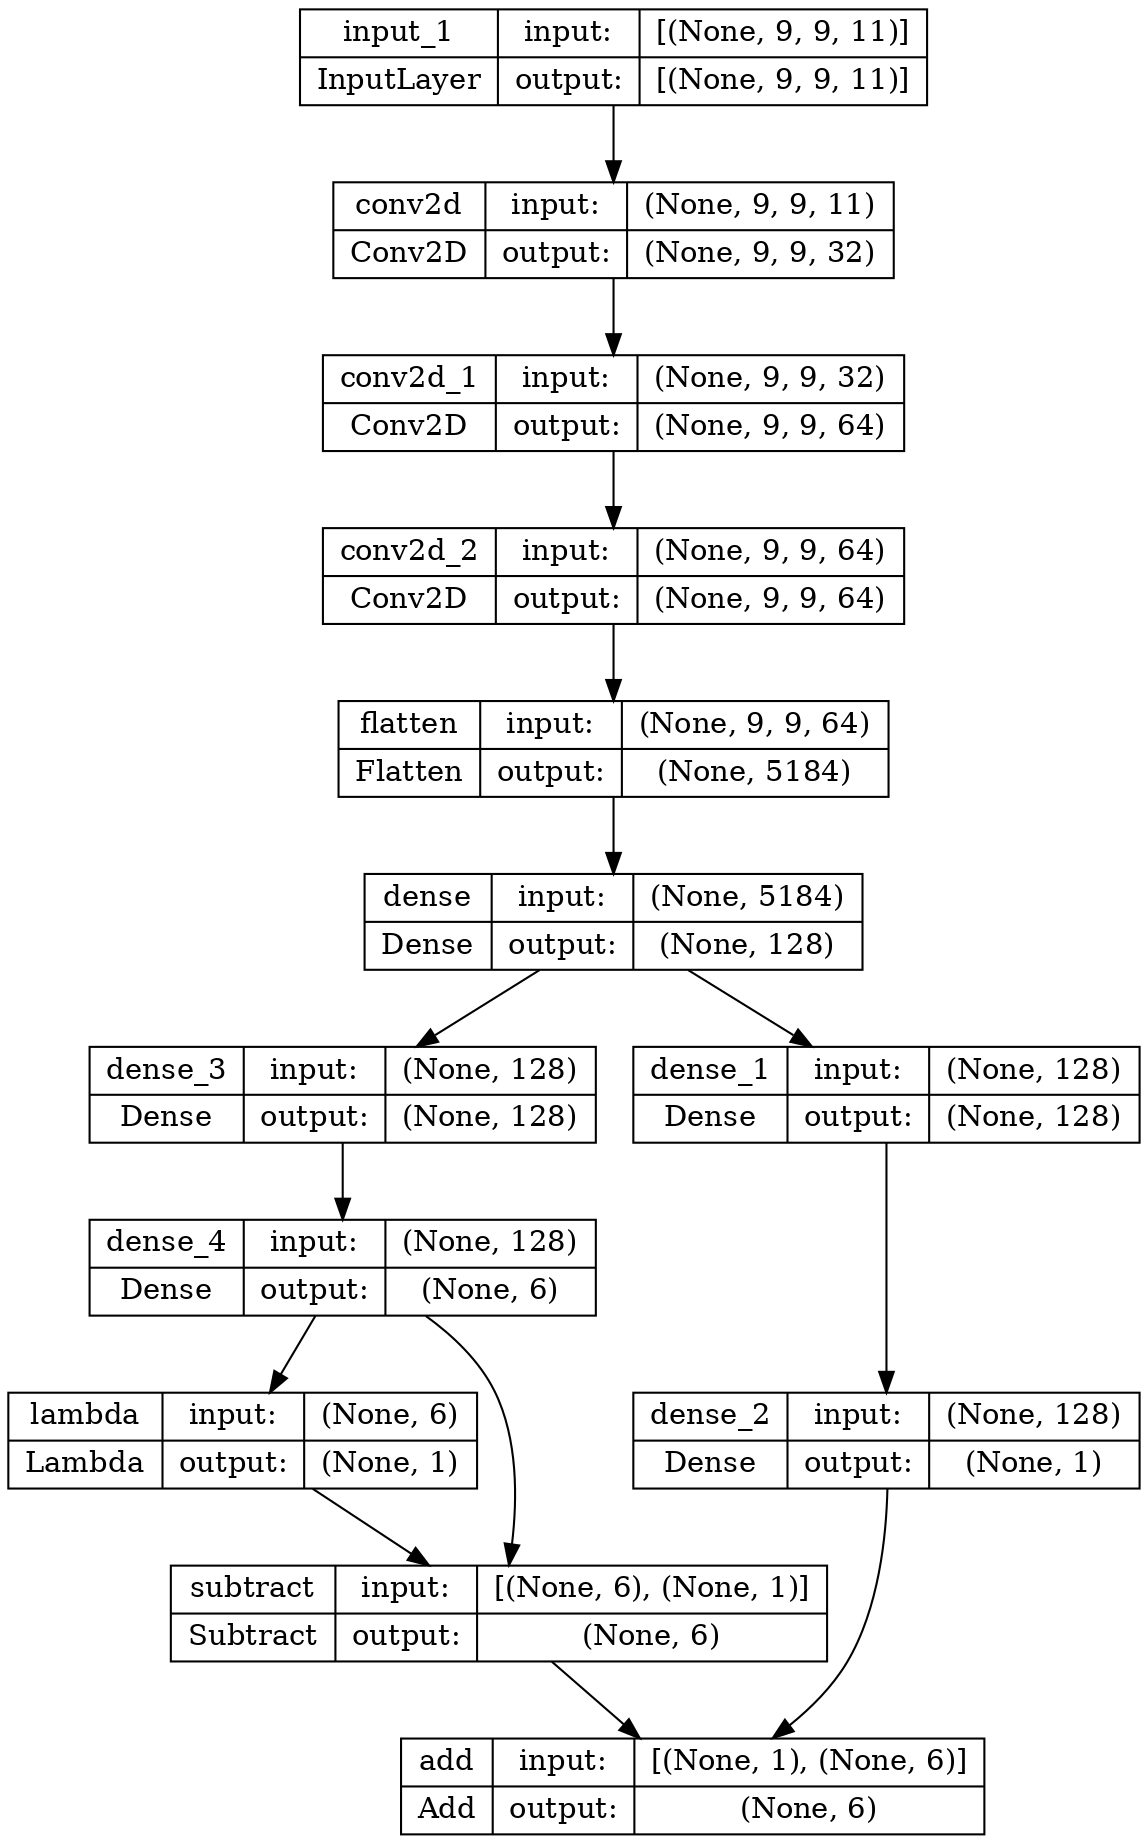

In [9]:
import os
import pickle
import random

import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

from q_deep_agent import DeepQAgent

from q_helpers import get_legal_actions, ACTS, N_ACTIONS, N_STATES, state_to_tabular_features, describe_tabular_state

from tensorflow.keras.utils import plot_model

def build_cnn(input_shape, num_actions, lr=1e-4, clipnorm=10.0):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, 3, padding="same", activation="relu")(inputs)
    x = layers.Conv2D(64, 3, padding="same", activation="relu")(x)
    x = layers.Conv2D(64, 3, padding="same", activation="relu")(x)

    x = layers.Flatten()(x)                 # keep spatial info
    x = layers.Dense(128, activation="relu")(x)

    # value
    v = layers.Dense(128, activation="relu")(x)
    v = layers.Dense(1)(v)

    # advantage
    a = layers.Dense(128, activation="relu")(x)
    a = layers.Dense(num_actions)(a)

    # dueling combine (use Lambda to stay on-graph)
    a_mean = layers.Lambda(lambda t: tf.reduce_mean(t, axis=1, keepdims=True))(a)
    q = layers.Add()([v, layers.Subtract()([a, a_mean])])

    model = tf.keras.Model(inputs, q)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr, clipnorm=clipnorm),
        loss=tf.keras.losses.Huber()
    )
    return model

model = build_cnn(input_shape=(9, 9, 11), num_actions=6)

# Save to file
plot_model(model,
           to_file="figures/13_dqn_cnn_architecture.png",
           show_shapes=True,
           show_layer_names=True,
           expand_nested=True,
           dpi=150)


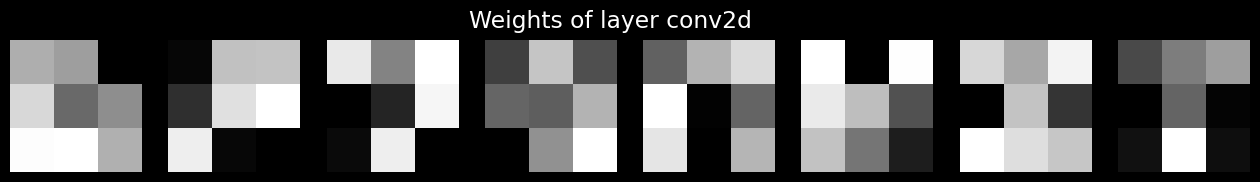

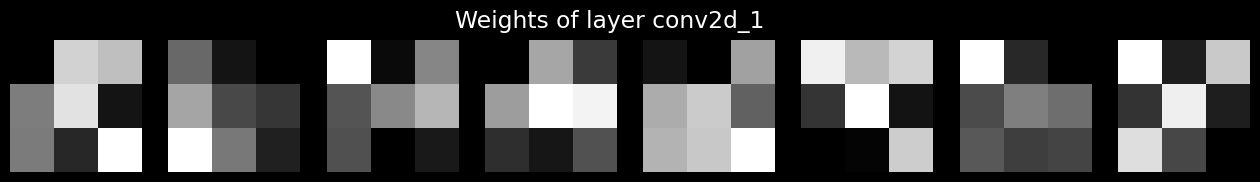

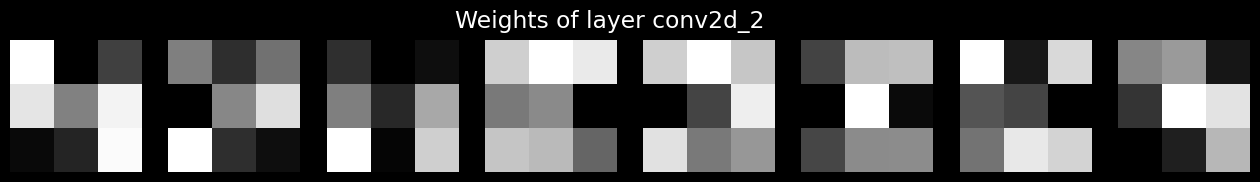

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_conv_weights(model, layer_name, max_filters=8):
    layer = model.get_layer(name=layer_name)
    weights, biases = layer.get_weights()

    # weights shape: (kernel_height, kernel_width, input_channels, num_filters)
    num_filters = min(weights.shape[-1], max_filters)

    fig, axes = plt.subplots(1, num_filters, figsize=(num_filters*2, 2))
    for i in range(num_filters):
        # Take one channel (first input channel)
        kernel = weights[:, :, 0, i]
        ax = axes[i]
        ax.imshow(kernel, cmap="gray")
        ax.axis("off")
    plt.suptitle(f"Weights of layer {layer_name}")
    plt.show()

# Example usage
visualize_conv_weights(model, "conv2d")       # first Conv layer
visualize_conv_weights(model, "conv2d_1")     # second Conv layer
visualize_conv_weights(model, "conv2d_2")     # third Conv layer


1/1 [==============================] - 0s 116ms/step


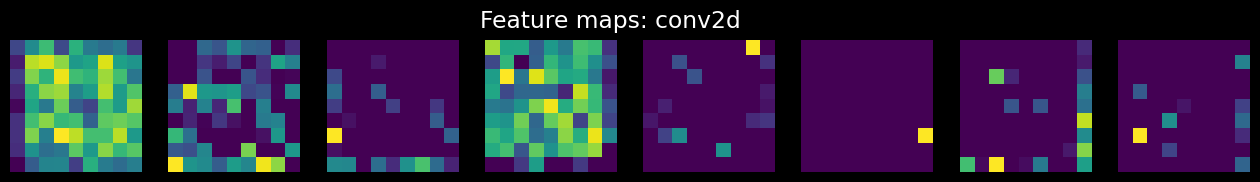

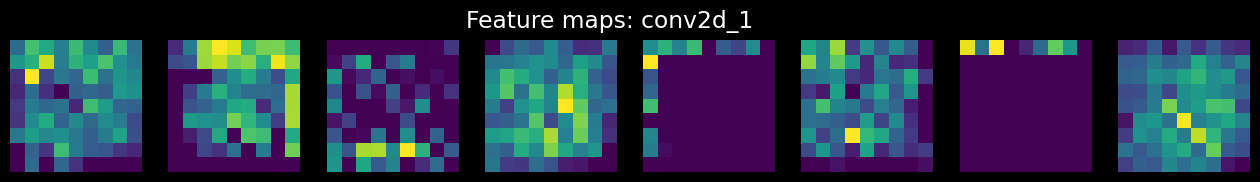

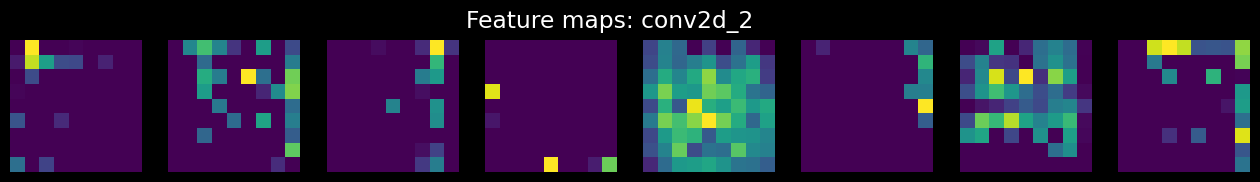

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models

def visualize_feature_maps(model, sample_input, max_filters=8):
    # Select convolutional layers
    conv_layers = [layer for layer in model.layers if "conv" in layer.name]
    layer_outputs = [layer.output for layer in conv_layers]
    activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

    # Run forward pass to get activations
    activations = activation_model.predict(sample_input)

    for layer_name, layer_activation in zip([l.name for l in conv_layers], activations):
        # layer_activation shape: (batch, h, w, num_filters)
        n_filters = min(layer_activation.shape[-1], max_filters)

        fig, axes = plt.subplots(1, n_filters, figsize=(n_filters*2, 2))
        for i in range(n_filters):
            axes[i].imshow(layer_activation[0, :, :, i], cmap="viridis")
            axes[i].axis("off")
        plt.suptitle(f"Feature maps: {layer_name}")
        plt.show()

# Example usage:
sample_input = np.random.random((1, 9, 9, 11))  # Replace with a real environment frame if possible
visualize_feature_maps(model, sample_input, max_filters=8)


## Figure 5: Coin Grabber

In [74]:
from PIL import Image
import os
import re

# Path to folder with your images
folder = 'screenshots/coin_grabber'

# Regex to match filenames like: "Round 01 (2025-07-24 09-46-17)_00001.png"
pattern = re.compile(r'^Round 01.*_(\d+)\.png$')

# List and sort matching files by frame number
files = sorted(
    [f for f in os.listdir(folder) if pattern.match(f)],
    key=lambda f: int(pattern.match(f).group(1))
)
print(files)

# Optionally select a subset
selected_files = files


image_paths = [os.path.join(folder, f) for f in selected_files]

# Define crop box: (left, top, right, bottom)
# Example: remove a 10-pixel border on all sides
CROP_BOX = (125, 125, -525, -125)  # negative values mean relative to image size

frames = []
for path in image_paths:
    img = Image.open(path)
    width, height = img.size

    # Compute absolute crop box
    left = CROP_BOX[0]
    top = CROP_BOX[1]
    right = width + CROP_BOX[2]  # e.g., -10 becomes width - 10
    bottom = height + CROP_BOX[3]

    cropped = img.crop((left, top, right, bottom))

    # Create new image with transparent border
    border_size = 8
    bordered = Image.new("RGBA",
                         (cropped.width + 2 * border_size, cropped.height + 2 * border_size),
                         (0, 0, 0, 0))  # fully transparent
    bordered.paste(cropped, (border_size, border_size))

    # Convert to P mode but keep transparency
    frames.append(bordered.convert("P", palette=Image.ADAPTIVE))

# Save to GIF
output_path = 'figures/5_coin_grabber.gif'
frames[0].save(
    output_path,
    save_all=True,
    append_images=frames[1:],
    duration=100,
    loop=0,
    optimize=True

)

['Round 01 (2025-07-24 13-44-56)_00001.png', 'Round 01 (2025-07-24 13-44-56)_00002.png', 'Round 01 (2025-07-24 13-44-56)_00003.png', 'Round 01 (2025-07-24 13-44-56)_00004.png', 'Round 01 (2025-07-24 13-44-56)_00005.png', 'Round 01 (2025-07-24 13-44-56)_00006.png', 'Round 01 (2025-07-24 13-44-56)_00007.png', 'Round 01 (2025-07-24 13-44-56)_00008.png', 'Round 01 (2025-07-24 13-44-56)_00009.png', 'Round 01 (2025-07-24 13-44-56)_00010.png', 'Round 01 (2025-07-24 13-44-56)_00011.png', 'Round 01 (2025-07-24 13-44-56)_00012.png', 'Round 01 (2025-07-24 13-44-56)_00013.png', 'Round 01 (2025-07-24 13-44-56)_00014.png', 'Round 01 (2025-07-24 13-44-56)_00015.png', 'Round 01 (2025-07-24 13-44-56)_00016.png', 'Round 01 (2025-07-24 13-44-56)_00017.png', 'Round 01 (2025-07-24 13-44-56)_00018.png', 'Round 01 (2025-07-24 13-44-56)_00019.png', 'Round 01 (2025-07-24 13-44-56)_00020.png', 'Round 01 (2025-07-24 13-44-56)_00021.png', 'Round 01 (2025-07-24 13-44-56)_00022.png', 'Round 01 (2025-07-24 13-44-56)

## Figure 6: Crate Hero

In [73]:
from PIL import Image
import os
import re

# Path to folder with your images
folder = 'screenshots/crate_hero'

# Regex to match filenames like: "Round 01 (2025-07-24 09-46-17)_00001.png"
pattern = re.compile(r'^Round 01.*_(\d+)\.png$')

# List and sort matching files by frame number
files = sorted(
    [f for f in os.listdir(folder) if pattern.match(f)],
    key=lambda f: int(pattern.match(f).group(1))
)
print(files)

# Optionally select a subset
selected_files = files


image_paths = [os.path.join(folder, f) for f in selected_files]

# Define crop box: (left, top, right, bottom)
# Example: remove a 10-pixel border on all sides
CROP_BOX = (125, 125, -525, -125)  # negative values mean relative to image size

frames = []
for path in image_paths:
    img = Image.open(path)
    width, height = img.size

    # Compute absolute crop box
    left = CROP_BOX[0]
    top = CROP_BOX[1]
    right = width + CROP_BOX[2]  # e.g., -10 becomes width - 10
    bottom = height + CROP_BOX[3]

    cropped = img.crop((left, top, right, bottom))

    # Create new image with transparent border
    border_size = 8
    bordered = Image.new("RGBA",
                         (cropped.width + 2 * border_size, cropped.height + 2 * border_size),
                         (0, 0, 0, 0))  # fully transparent
    bordered.paste(cropped, (border_size, border_size))

    # Convert to P mode but keep transparency
    frames.append(bordered.convert("P", palette=Image.ADAPTIVE))

# Save to GIF
output_path = 'figures/6_crate_hero.gif'
frames[0].save(
    output_path,
    save_all=True,
    append_images=frames[1:],
    duration=100,
    loop=0,
    optimize=True

)

['Round 01 (2025-07-24 15-51-29)_00001.png', 'Round 01 (2025-07-24 15-51-29)_00002.png', 'Round 01 (2025-07-24 15-51-29)_00003.png', 'Round 01 (2025-07-24 15-51-29)_00004.png', 'Round 01 (2025-07-24 15-51-29)_00005.png', 'Round 01 (2025-07-24 15-51-29)_00006.png', 'Round 01 (2025-07-24 15-51-29)_00007.png', 'Round 01 (2025-07-24 15-51-29)_00008.png', 'Round 01 (2025-07-24 15-51-29)_00009.png', 'Round 01 (2025-07-24 15-51-29)_00010.png', 'Round 01 (2025-07-24 15-51-29)_00011.png', 'Round 01 (2025-07-24 15-51-29)_00012.png', 'Round 01 (2025-07-24 15-51-29)_00013.png', 'Round 01 (2025-07-24 15-51-29)_00014.png', 'Round 01 (2025-07-24 15-51-29)_00015.png', 'Round 01 (2025-07-24 15-51-29)_00016.png', 'Round 01 (2025-07-24 15-51-29)_00017.png', 'Round 01 (2025-07-24 15-51-29)_00018.png', 'Round 01 (2025-07-24 15-51-29)_00019.png', 'Round 01 (2025-07-24 15-51-29)_00020.png', 'Round 01 (2025-07-24 15-51-29)_00021.png', 'Round 01 (2025-07-24 15-51-29)_00022.png', 'Round 01 (2025-07-24 15-51-29)

## Figure 7: Allstar

`python3 main.py play --agents tq_allstar peaceful_agent rule_based_agent rule_based_agent --make-video`

In [72]:
from PIL import Image
import os
import re

# Path to folder with your images
folder = 'screenshots/allstar'

# Updated regex to match any round number (e.g., Round 01, Round 02, etc.)
pattern = re.compile(r'^Round (\d+).*\_(\d+)\.png$')

# List and sort matching files by round number and then by frame number
files = sorted(
    [f for f in os.listdir(folder) if pattern.match(f)],
    key=lambda f: (int(pattern.match(f).group(1)), int(pattern.match(f).group(2)))
)


# Optionally select a subset
selected_files = files


image_paths = [os.path.join(folder, f) for f in selected_files]

# Define crop box: (left, top, right, bottom)
# Example: remove a 10-pixel border on all sides
CROP_BOX = (125, 125, -525, -125)  # negative values mean relative to image size

frames = []
for path in image_paths:
    img = Image.open(path)
    width, height = img.size

    # Compute absolute crop box
    left = CROP_BOX[0]
    top = CROP_BOX[1]
    right = width + CROP_BOX[2]  # e.g., -10 becomes width - 10
    bottom = height + CROP_BOX[3]

    cropped = img.crop((left, top, right, bottom))

    # Create new image with transparent border
    border_size = 8
    bordered = Image.new("RGBA",
                         (cropped.width + 2 * border_size, cropped.height + 2 * border_size),
                         (0, 0, 0, 0))  # fully transparent
    bordered.paste(cropped, (border_size, border_size))

    # Convert to P mode but keep transparency
    frames.append(bordered.convert("P", palette=Image.ADAPTIVE))

# Save to GIF
output_path = 'figures/7_allstar.gif'
frames[0].save(
    output_path,
    save_all=True,
    append_images=frames[1:],
    duration=100,
    loop=0,
    optimize=True

)

## Figures 8 and 9

In [2]:
#!/usr/bin/env python3
import os
import re
import json
import numpy as np
import matplotlib.pyplot as plt

def _npz_item(data, key, default=None):
    """Safely unwrap a 0-D object array from an npz (saved via np.array(obj, dtype=object))."""
    if key in data.files:
        return data[key].item()
    return default

def _collect_npz_files_with_chunk_indices(folder):
    """
    Return dict: chunk_idx -> path for all .npz files in folder.
    Prefer parsing from filename '*_chunk_####.npz'; fallback to reading meta.chunk_idx.
    """
    npz_files = {}
    name_pat = re.compile(r".*_chunk_(\d+)\.npz$")
    for f in os.listdir(folder):
        if not f.endswith(".npz"):
            continue
        path = os.path.join(folder, f)
        m = name_pat.match(f)
        if m:
            npz_files[int(m.group(1))] = path
            continue
        # Fallback: open and read meta.chunk_idx
        try:
            with np.load(path, allow_pickle=True) as data:
                meta = _npz_item(data, "meta", {}) or {}
                ci = meta.get("chunk_idx", None)
                if ci is not None:
                    npz_files[int(ci)] = path
        except Exception:
            # Ignore unreadable files
            pass
    return npz_files

def load_q_visits_snapshots(folder, agent=None):
    """Load q_visits from NPZ snapshots and matching evaluation JSON results."""
    # Find NPZ snapshots and eval JSONs
    eval_pat = re.compile(r"eval_chunk_(\d+)\.json$")
    eval_files = {}
    for f in os.listdir(folder):
        m = eval_pat.match(f)
        if m:
            eval_files[int(m.group(1))] = os.path.join(folder, f)

    # Only keep chunks where we have both NPZ and eval
    chunk_indices = sorted(set(eval_files.keys()))

    total_counts = []
    unique_counts = []
    avg_scores = []

    for idx in chunk_indices:
        # --- Load Evaluation JSON ---
        with open(eval_files[idx], "r") as f:
            eval_data = json.load(f)

        agent_data = None
        by_agent = eval_data.get("by_agent", {})

        if agent is None:
            # Pick the first agent name containing 'tq'
            for agent_name, stats in by_agent.items():
                if "tq" in agent_name:
                    agent_data = stats
                    break
            if agent_data is None and by_agent:
                # Fallback to any agent if none has 'tq'
                first_key = next(iter(by_agent))
                agent_data = by_agent[first_key]
        else:
            if agent not in by_agent:
                raise KeyError(f"Agent '{agent}' not found in eval for chunk {idx}. "
                               f"Available: {list(by_agent.keys())}")
            agent_data = by_agent[agent]

        # Score heuristic: prefer 'score', else coins + 5*kills
        score_total = agent_data.get("score", None)
        if score_total is None:
            score_total = agent_data.get("coins", 0) + 5 * agent_data.get("kills", 0) - 5 * agent_data.get("suicides", 0)

        rounds = max(1, int(agent_data.get("rounds", 1)))
        avg_score = score_total / rounds

        # Append metrics
        avg_scores.append(avg_score)

    return chunk_indices, avg_scores


In [38]:

c3, t3 = load_q_visits_snapshots("agent_code/cnn_allstar_duel_pretrain/snapshots/dicts", agent="cnn_allstar_duel_pretrain")
c4, t4 = load_q_visits_snapshots("agent_code/cnn_allstar_duel_pretrain/snapshots/dicts", agent="peaceful_agent")
c5, t5 = load_q_visits_snapshots("agent_code/cnn_allstar_duel_pretrain/snapshots/dicts", agent="rule_based_agent_0")
c6, t6 = load_q_visits_snapshots("agent_code/cnn_allstar_duel_pretrain/snapshots/dicts", agent="rule_based_agent_1")

In [83]:

c3, t3 = load_q_visits_snapshots("agent_code/cnn_allstar_duel/dicts", agent="cnn_allstar_duel")
c4, t4 = load_q_visits_snapshots("agent_code/cnn_allstar_duel/dicts", agent="peaceful_agent")
c5, t5 = load_q_visits_snapshots("agent_code/cnn_allstar_duel/dicts", agent="rule_based_agent")
c6, t6 = load_q_visits_snapshots("agent_code/cnn_allstar_duel/dicts", agent="tq_representator")

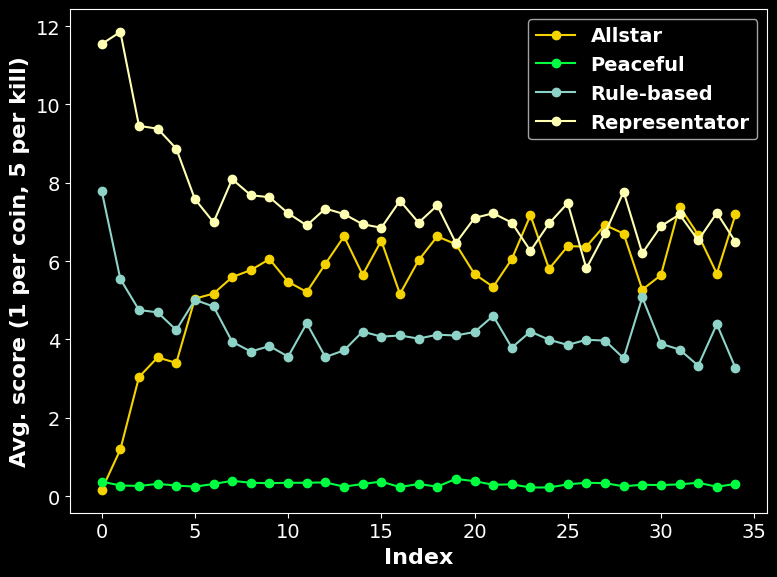

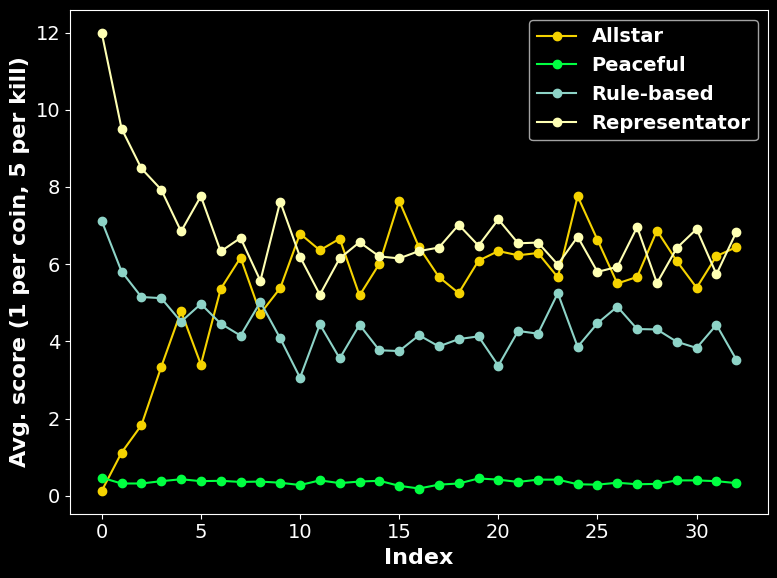

In [84]:

import matplotlib.pyplot as plt
import numpy as np

# Use dark background
plt.style.use('dark_background')

# Glowing line style setup
linewidths     = np.logspace(-5, 5, 20, base=2)
transparencies = np.linspace(1, 0, 20)

# Neon color palette
neon_colors = [
    '#08F7FE',  # Coingrabber - neon cyan
    '#FE53BB',  # Cratehero - neon pink
    '#F5D300',  # Allstar - neon yellow
    '#00FF41',  # Rule-based agent - neon green (only for second plot)
]


plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["DejaVu Sans"],  # Or any available sans-serif font
    "font.size": 14,                     # Base font size
    "axes.labelweight": "bold",         # Make axis labels bold
    "axes.titlesize": 16,               # Title font size if used
    "axes.labelsize": 16,               # Axis label size
    "legend.fontsize": 14,              # Legend font size
    "legend.title_fontsize": 14,        # Legend title size (if used)
})

# ----------- Plot 1: Average evaluation score ------------
plt.figure(figsize=(8, 6))

# Final visible lines with labels
plt.plot(c3, t3, label="Allstar", c=neon_colors[2], marker='o')
plt.plot(c4, t4, label="Peaceful", c=neon_colors[3], marker='o')
plt.plot(c5, t5, label="Rule-based", marker='o')
plt.plot(c6, t6, label="Representator", marker='o')

plt.xlabel("Index")
plt.ylabel("Avg. score (1 per coin, 5 per kill)")
plt.legend(prop=dict(weight='bold'))
plt.tight_layout()
plt.show()



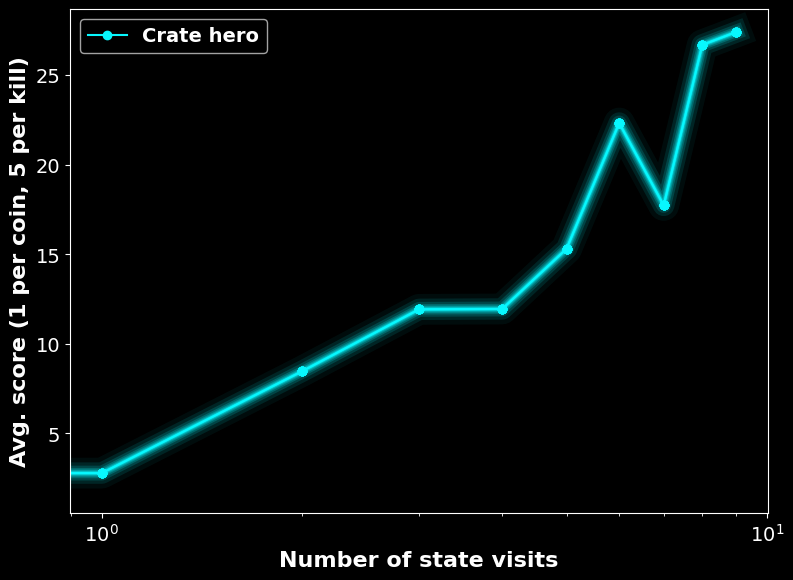

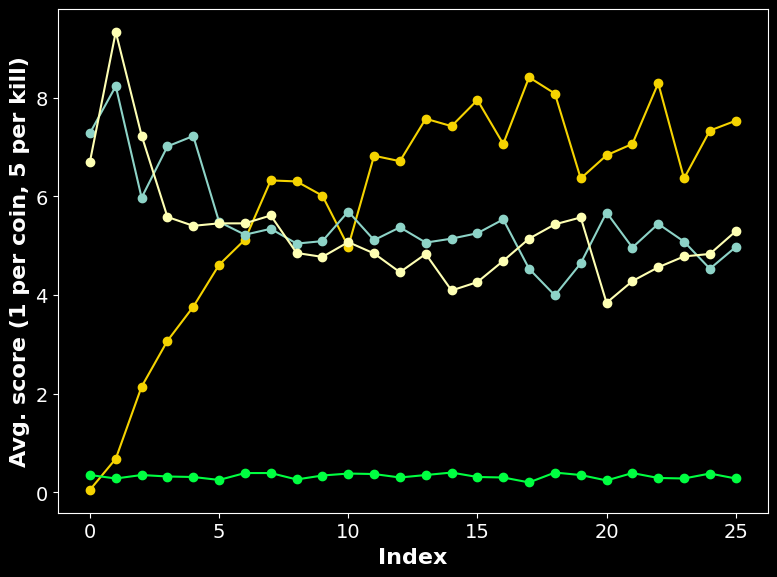

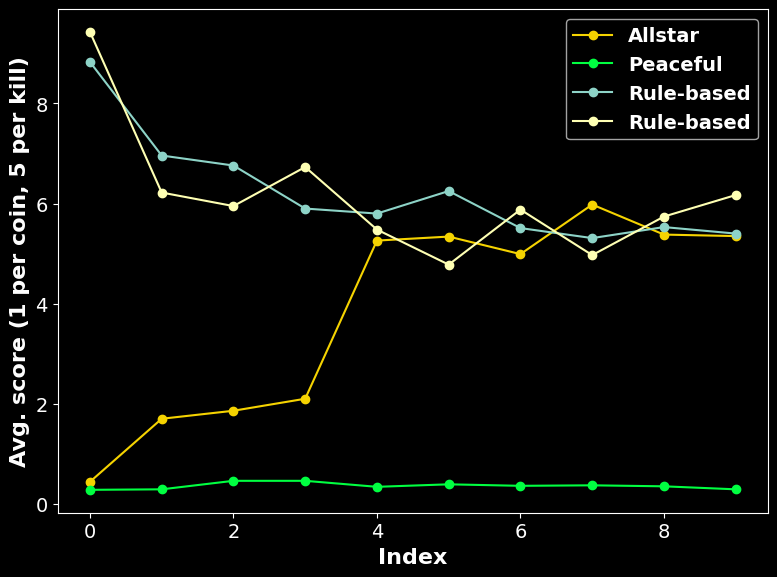

In [ ]:
import json
fn1 = "agent_code/cnn_allstar_duel/snapshots/experiment_29_training_log.json"
fn2 = "agent_code/cnn_allstar_duel/snapshots/experiment_04_training_log.json"


# Open and load JSON file
with open(fn1, 'r') as file:
    data  = json.load(file)

# Open and load JSON file
with open(fn2, 'r') as file:
    data2 = json.load(file)
# Now `data` is a Python dictionary (or list, depending on the JSON structure)
for v in data2:
    print(v)

{'training_round': 0, 'gradient_step': 0, 'loss': 0.023157520219683647}
{'training_round': 0, 'gradient_step': 1, 'loss': 0.02133096009492874}
{'training_round': 0, 'gradient_step': 2, 'loss': 0.01794973388314247}
{'training_round': 0, 'gradient_step': 3, 'loss': 0.013799733482301235}
{'training_round': 1, 'gradient_step': 0, 'loss': 0.012875359505414963}
{'training_round': 1, 'gradient_step': 1, 'loss': 0.009683936834335327}
{'training_round': 1, 'gradient_step': 2, 'loss': 0.014350119046866894}
{'training_round': 1, 'gradient_step': 3, 'loss': 0.00831863097846508}
{'training_round': 2, 'gradient_step': 0, 'loss': 0.013149388134479523}
{'training_round': 2, 'gradient_step': 1, 'loss': 0.02256949618458748}
{'training_round': 2, 'gradient_step': 2, 'loss': 0.007296192459762096}
{'training_round': 2, 'gradient_step': 3, 'loss': 0.011028802022337914}
{'training_round': 3, 'gradient_step': 0, 'loss': 0.013676377944648266}
{'training_round': 3, 'gradient_step': 1, 'loss': 0.0076568434014916

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


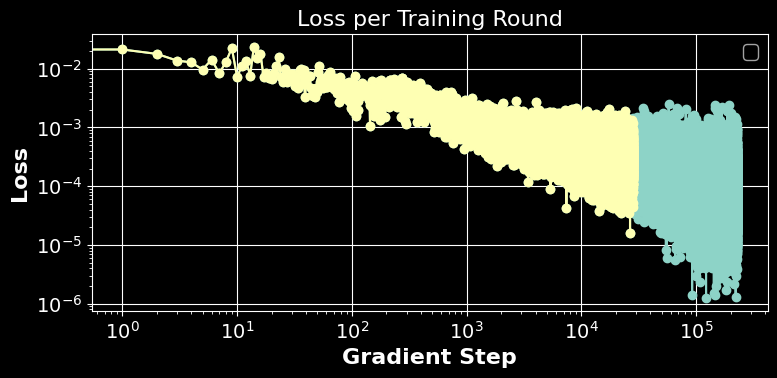

In [20]:
from matplotlib import pyplot as plt

# Option 1: Plot loss over global gradient step
x1 = list(range(len(data)))
y1 = [entry['loss'] for entry in data]

x2 = list(range(len(data2)))
y2 = [entry['loss'] for entry in data2]
plt.figure(figsize=(8, 4))
plt.plot(x1, y1, marker='o')
plt.plot(x2, y2, marker='o')
plt.title('Loss per Training Round')
plt.xlabel('Gradient Step')
plt.ylabel('Loss')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Total number of states:

Which agent plays best?

`python3 main.py play --agents cnn_allstar_duel peaceful_agent rule_based_agent tq_representator --n-rounds 1000 --save-stats --no-gui`

In [1]:
import json
import pandas as pd

# --- Load Evaluation JSON ---
with open("results/2025-09-11 13-14-00.json", "r") as f:
    eval_data = json.load(f)


# Extract agent names and scores
data = []

# Get the list of all categories (keys from the first agent's scores)
all_categories = list(next(iter(eval_data["by_agent"].values())).keys())

# Iterate through the agents and ensure all attributes are present
for agent_name, scores in eval_data["by_agent"].items():
    row = [agent_name]
    for category in all_categories:
        # Add the score if available, otherwise add 0 for missing categories
        row.append(f"{scores.get(category, 0) / 1000:.2g}")
    data.append(row)

# Create a DataFrame
df = pd.DataFrame(data, columns=["Agent"] + all_categories)

# Display the DataFrame vertically (transposed)
df.T  # This will transpose the table in Jupyter


,0,1,2,3
Agent,cnn_allstar_duel,peaceful_agent,rule_based_agent,tq_representator
bombs,25,0,6.7,15
coins,3,0.33,2,3.4
crates,5.5,0,6.5,8.6
invalid,2,19,3.7,3.6
kills,0.7,0,0.38,0.56
moves,1.5e+02,15,1e+02,1.8e+02
rounds,1,1,1,1
score,6.5,0.33,3.9,6.2
steps,2.8e+02,34,1.2e+02,2e+02


In [7]:
import json
import pandas as pd

# --- Load Evaluation JSON ---
with open("results/2025-09-27 08-40-10.json", "r") as f:
    eval_data = json.load(f)


# Extract agent names and scores
data = []

# Get the list of all categories (keys from the first agent's scores)
all_categories = list(next(iter(eval_data["by_agent"].values())).keys())

# Iterate through the agents and ensure all attributes are present
for agent_name, scores in eval_data["by_agent"].items():
    row = [agent_name]
    for category in all_categories:
        # Add the score if available, otherwise add 0 for missing categories
        row.append(f"{scores.get(category, 0) / 1000:.2g}")
    data.append(row)

# Create a DataFrame
df = pd.DataFrame(data, columns=["Agent"] + all_categories)

# Display the DataFrame vertically (transposed)
df.T  # This will transpose the table in Jupyter


,0,1,2,3
Agent,cnn_allstar_duel,peaceful_agent,rule_based_agent,tq_representator
bombs,42,0,7.3,11
coins,2.7,0.33,2,3.8
crates,6.3,0,6,8.3
invalid,2,19,4.1,3.3
kills,0.93,0,0.38,0.59
moves,2.4e+02,15,90,1.3e+02
rounds,1,1,1,1
score,7.3,0.33,3.9,6.7
steps,3e+02,34,1.1e+02,1.5e+02


In [28]:
# Start Markdown table (first row with agents)
markdown_output = "| Category | " + " | ".join(eval_data["by_agent"].keys()) + " |\n"
markdown_output += "|----------|-" + "|".join(["-" * len(agent) for agent in eval_data["by_agent"].keys()]) + "|\n"

# Add rows for each category (Score 1, Score 2, etc.)
categories = next(iter(eval_data["by_agent"].values())).keys()
for category in categories:
    markdown_output += f"| {category} | " + " | ".join([
        f"{scores.get(category, 0) / 1000:.2g}" for scores in eval_data["by_agent"].values()
    ]) + " |\n"

print(markdown_output)

| Category | tq_allstar | peaceful_agent | rule_based_agent | tq_representator |
|----------|-----------|--------------|----------------|----------------|
| bombs | 18 | 0 | 8 | 19 |
| coins | 3.5 | 0.33 | 2.1 | 3 |
| crates | 6.5 | 0 | 6.3 | 8.1 |
| invalid | 2.1 | 18 | 4.7 | 3.4 |
| kills | 0.57 | 0 | 0.48 | 0.62 |
| moves | 1.3e+02 | 14 | 69 | 1.3e+02 |
| rounds | 1 | 1 | 1 | 1 |
| score | 6.3 | 0.33 | 4.5 | 6.1 |
| steps | 1.5e+02 | 33 | 84 | 1.5e+02 |
| suicides | 0.61 | 0 | 0.34 | 0.52 |
| time | 0.08 | 0.00099 | 0.04 | 0.061 |



t1